In [1]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [3]:
df = pd.read_csv('./data/sample_consensus.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: './data/sample_consensus.csv'

In [17]:
# creating prediction model

# creating the filters 
filters =  ['unanimous', 'unison', 'common', 'unanimously', 'commonly', 'citizens need', 
            'most poeple', 'more people' , 'donors', 'participants', 'voters think', 'voters believe', 
            'voters advocate', 'voters want', 'we want', 'americans want',  
            'everyone agrees', 'everyone thinks', 'everyone believes', 'we all', 'majority']

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.713
              precision    recall  f1-score   support

no-authority       0.69      0.76      0.73        54
   authority       0.73      0.67      0.70        54

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108

confusion matrix:
[[41 13]
 [18 36]]



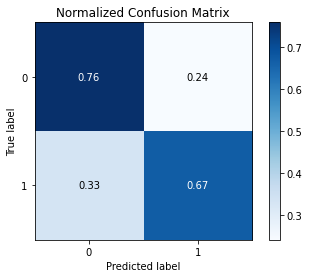

In [18]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['authority'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['authority'], y_pred, target_names=['no-authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['authority'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['authority'], y_pred, normalize=True)
plt.show()